Shape of dataset: (18368, 13)
Columns: ['ID', 'SystemCodeNumber', 'Capacity', 'Latitude', 'Longitude', 'Occupancy', 'VehicleType', 'TrafficConditionNearby', 'QueueLength', 'IsSpecialDay', 'LastUpdatedDate', 'LastUpdatedTime', 'timestamp']
ID                                 int64
SystemCodeNumber                  object
Capacity                           int64
Latitude                         float64
Longitude                        float64
Occupancy                          int64
VehicleType                       object
TrafficConditionNearby            object
QueueLength                        int64
IsSpecialDay                       int64
LastUpdatedDate                   object
LastUpdatedTime                   object
timestamp                 datetime64[ns]
dtype: object
Missing values:
 ID                        0
SystemCodeNumber          0
Capacity                  0
Latitude                  0
Longitude                 0
Occupancy                 0
VehicleType               0
T

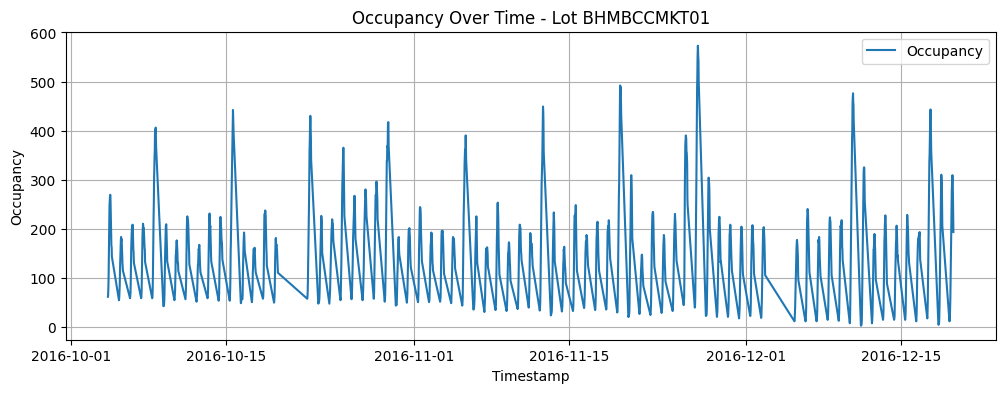

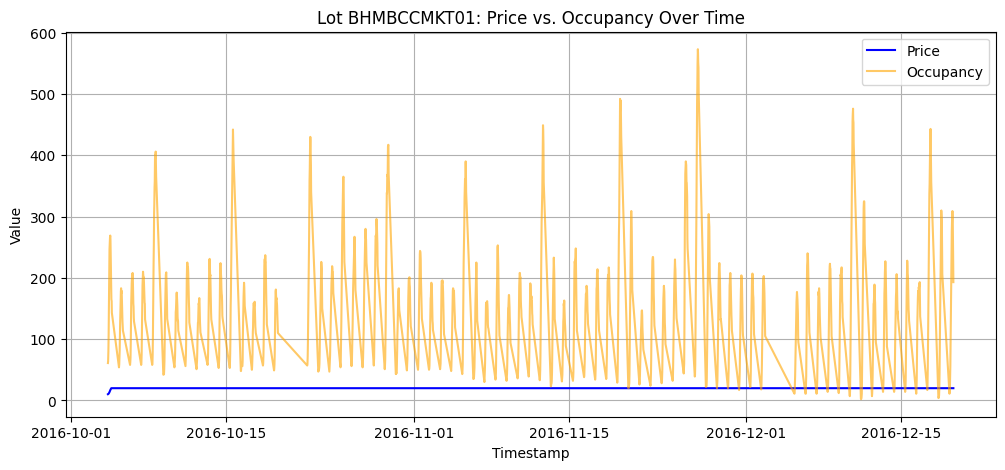


Model 1 (Baseline) complete. Ready for Model 2.


In [ ]:
# Dynamic Pricing for Urban Parking Lots - Model 1 (Baseline Linear Model)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# === Load Data ===
# The data is already loaded in a previous cell as 'df'

# === EDA ===
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
print(df.dtypes)
print("Missing values:\n", df.isnull().sum())

# Parse timestamp column
df['timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'], format='%d-%m-%Y %H:%M:%S')

# Summary info
date_range = (df['timestamp'].min(), df['timestamp'].max())
num_lots = df['SystemCodeNumber'].nunique()
print(f"Data from {date_range[0]} to {date_range[1]}")
print(f"Total unique parking lots: {num_lots}")

# Sample plot for occupancy
def plot_occupancy(df, lot_id):
    df_sample = df[df['SystemCodeNumber'] == lot_id]
    plt.figure(figsize=(12, 4))
    plt.plot(df_sample['timestamp'], df_sample['Occupancy'], label='Occupancy')
    plt.title(f'Occupancy Over Time - Lot {lot_id}')
    plt.xlabel('Timestamp')
    plt.ylabel('Occupancy')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot for first lot
plot_occupancy(df, df['SystemCodeNumber'].unique()[0])

# === Model 1: Baseline Linear Pricing ===
def baseline_price_model(df, alpha=2.0, base_price=10.0, min_price=5.0, max_price=20.0):
    df = df.copy()
    df = df.sort_values(by=['SystemCodeNumber', 'timestamp'])
    df['price'] = 0.0

    current_prices = {lot_id: base_price for lot_id in df['SystemCodeNumber'].unique()}
    prices = []

    for _, row in df.iterrows():
        lot_id = row['SystemCodeNumber']
        occ = row['Occupancy']
        cap = row['Capacity']

        if cap == 0:
            price = current_prices[lot_id]  # skip update if capacity is zero to avoid division error
        else:
            prev_price = current_prices[lot_id]
            new_price = prev_price + alpha * (occ / cap)
            new_price = max(min_price, min(max_price, new_price))
            current_prices[lot_id] = new_price
            price = new_price

        prices.append(price)

    df['price'] = prices
    return df

# Apply model
df_model1 = baseline_price_model(df)

# Plot price vs occupancy for a sample lot
lot_id = df['SystemCodeNumber'].unique()[0]
df_lot = df_model1[df_model1['SystemCodeNumber'] == lot_id]

plt.figure(figsize=(12, 5))
plt.plot(df_lot['timestamp'], df_lot['price'], label='Price', color='blue')
plt.plot(df_lot['timestamp'], df_lot['Occupancy'], label='Occupancy', color='orange', alpha=0.6)
plt.title(f'Lot {lot_id}: Price vs. Occupancy Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

print("\nModel 1 (Baseline) complete. Ready for Model 2.")